In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys
import glob
import os
import peakutils
import datetime
import warnings
import logging
from jupyterthemes import jtplot

In [2]:
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *

jtplot.style('default', grid=False)
logging.getLogger().setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")

plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['font.size'] = 18
plt.rc('font', size= 18)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 18)
plt.rc('xtick.major', size=6)
plt.rc('ytick.major', size=6)

plt.rc('ytick', labelsize= 18)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)

In [3]:
asf = dict({'C_1s' : 0.296, 'O_1s' : 0.711, 'N_1s' : 0.477, 'Ba_3d' : 7.49,
            'Cu_2p' : 5.321, 'Cl_2p' : 0.891})

## Pre-processing of data FBI on quartz window policrystal
1- Sublimations in UHV (15th Oct 2020)

## Import data

In [4]:
path = '/Users/pabloherrero/sabat/xps_spectra/DEA_Au(111)/**/*.xy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []
for f in files:
    if (' ' not in f) and ('/proc' not in f):
        files_new.append(f)

files = files_new
for f in files:
    print(f)

/Users/pabloherrero/sabat/xps_spectra/DEA_Au(111)/20200226_Au111_clean.xy
/Users/pabloherrero/sabat/xps_spectra/DEA_Au(111)/20200227_Au(111)_DEA_esther.xy
/Users/pabloherrero/sabat/xps_spectra/DEA_Au(111)/20200227_Au(111)_DEA_esther_Br_detail.xy
/Users/pabloherrero/sabat/xps_spectra/DEA_Au(111)/20200228_Au(111)_DEA_esther_Br_annealed.xy
/Users/pabloherrero/sabat/xps_spectra/DEA_Au(111)/20200228_Au(111)_DEA_esther_Br_annealed_detail.xy


In [18]:
experiments = [xps_data_import(path=f) for f in files]
experiments[0].name

'Au111_clean'

# BG subtraction

## Bulk subtract background

Max iterations exceeded, subtract ALS baseline
Max iterations exceeded, subtract ALS baseline
Max iterations exceeded, subtract ALS baseline
KeyError on  'Au4f'
Max iterations exceeded, subtract ALS baseline
Max iterations exceeded, subtract ALS baseline
Max iterations exceeded, subtract ALS baseline
Max iterations exceeded, subtract ALS baseline
Max iterations exceeded, subtract ALS baseline
KeyError on  'C1s'
KeyError on  'N1s'
KeyError on  'O1s'
Max iterations exceeded, subtract ALS baseline
KeyError on  'Au4f'
Max iterations exceeded, subtract ALS baseline
Max iterations exceeded, subtract ALS baseline
Max iterations exceeded, subtract ALS baseline


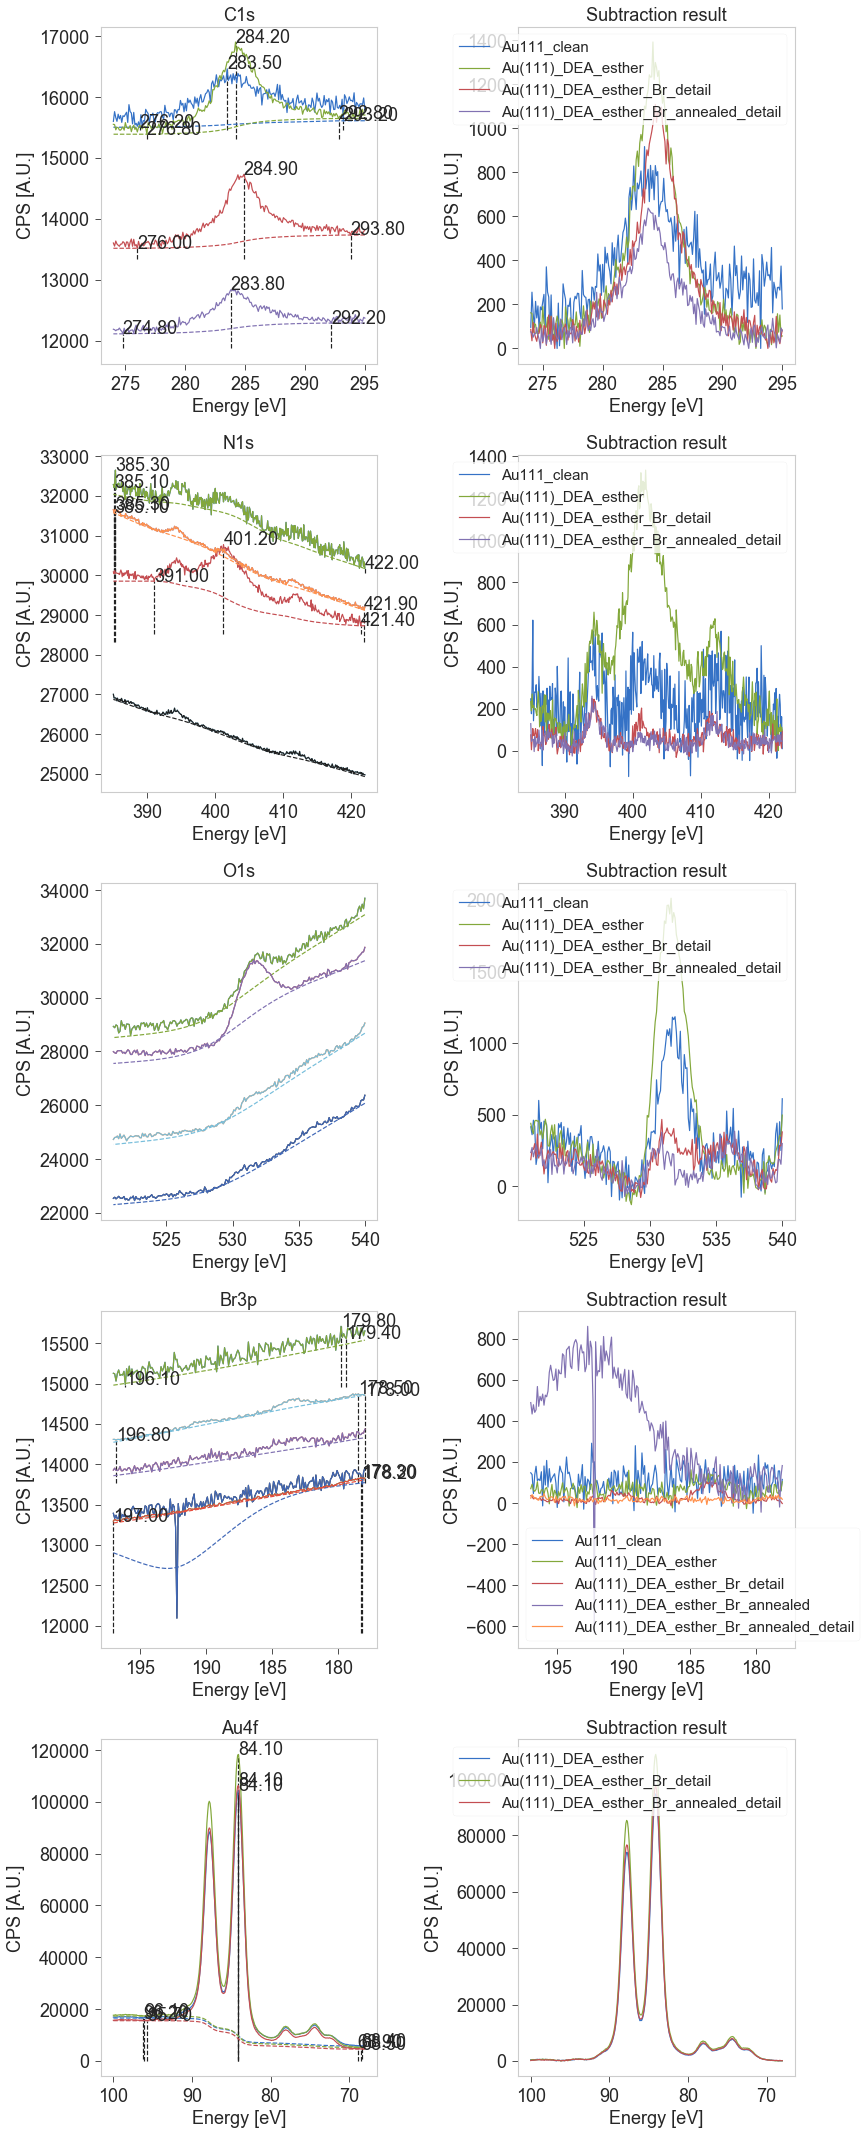

In [23]:
regions = ['C1s', 'N1s', 'O1s', 'Br3p', 'Au4f']
bg_exps = bulk_bg_subtract(experiments, regions)

## Fix O 1s tail

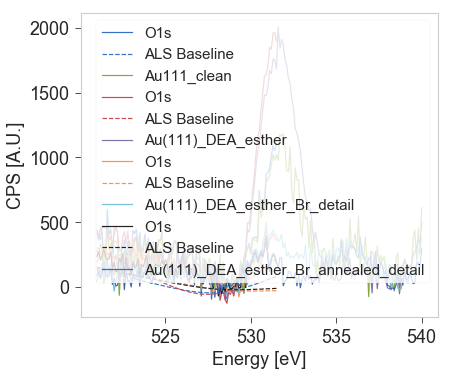

In [26]:
for xp in bg_exps:
    try:
        fix_tail_bg(xp, 'O1s', eup=531.5, inplace=True)
    except KeyError: pass

[(-100, 2500)]

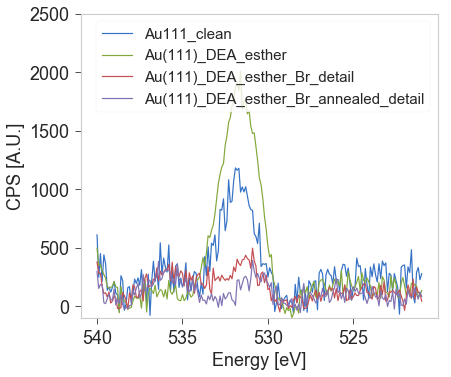

In [70]:
for xp in bg_exps:
    try: plot_region(xp, 'O1s')
    except KeyError: pass
plt.gca().invert_xaxis()
plt.gca().set(ylim=(-100, 2500))

[(22000.0, 38000.0)]

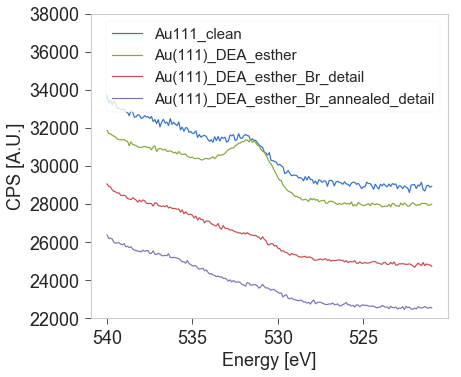

In [73]:
for xp in experiments:
    try: plot_region(xp, 'O1s')
    except KeyError: pass
plt.gca().invert_xaxis()
plt.gca().set(ylim=(22e3, 38e3))

## Compress noisy Br 3p

XPS_experiment(path='/Users/pabloherrero/sabat/xps_spectra/DEA_Au(111)/20200228_Au(111)_DEA_esther_Br_annealed.xy', delimiters=([42], [191], ['Br3p']), name='Au(111)_DEA_esther_Br_annealed', label='20200228_Au(111)_DEA_esther_Br_annealed', date='2020.02.28', other_meta='Au(111)_DEA_esther_Br_annealed', dfx=range        Br3p          
properties energy    counts
0           197.0  0.339922
1           196.9  0.301177
2           196.8  0.332506
3           196.7  0.306801
4           196.6  0.315523
..            ...       ...
186         178.4  0.086390
187         178.3  0.069685
188         178.2 -0.013444
189         178.1  0.090006
190         178.0  0.126858

[191 rows x 2 columns], area=None, fit={}, color=None, ls=None)

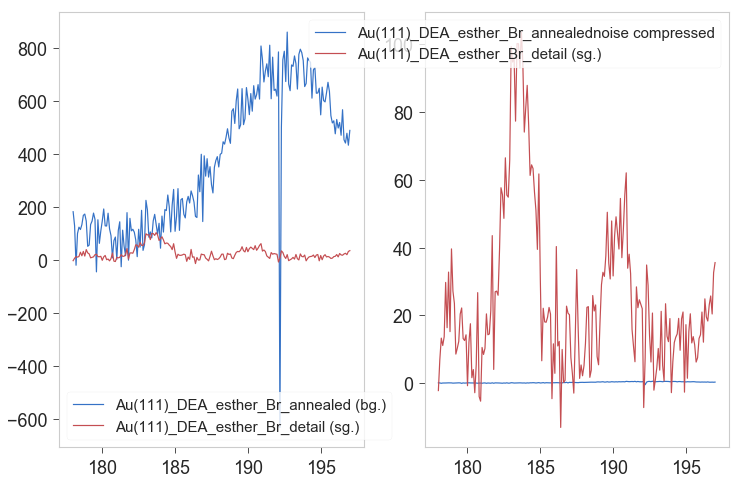

In [35]:
compress_noisy_region(bg_exps[3], bg_exps[2], 'Br3p', inplace=True);

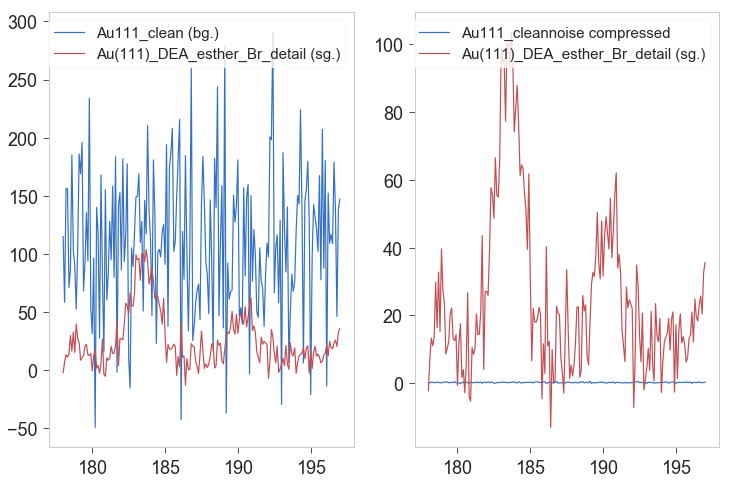

In [38]:
compress_noisy_region(bg_exps[0], bg_exps[2], 'Br3p', inplace=True);

## Look for Ta in overview (there is)

[(35000.0, 60000.0), (255, 215)]

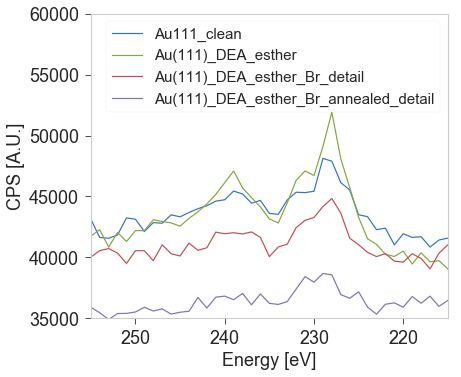

In [51]:
for xp in experiments:
    try: plot_region(xp, 'Overview')
    except KeyError: pass
plt.gca().invert_xaxis()
plt.gca().set(xlim=(255, 215), ylim=(3.5e4, 6e4))

[(-100, 1800)]

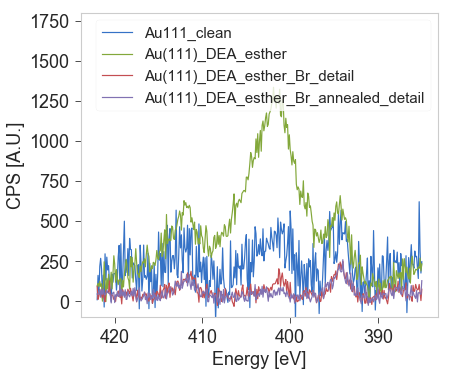

In [57]:
for xp in bg_exps:
    try: plot_region(xp, 'N1s')
    except KeyError: pass
plt.gca().invert_xaxis()
plt.gca().set(ylim=(-100, 1800))

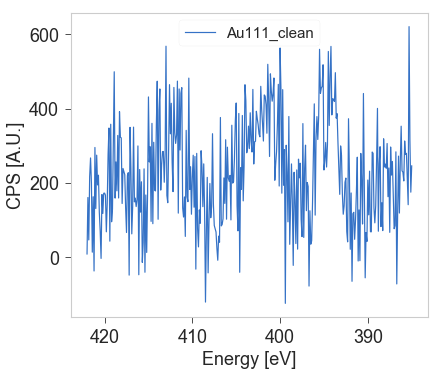

In [58]:
plot_region(bg_exps[0], 'N1s')

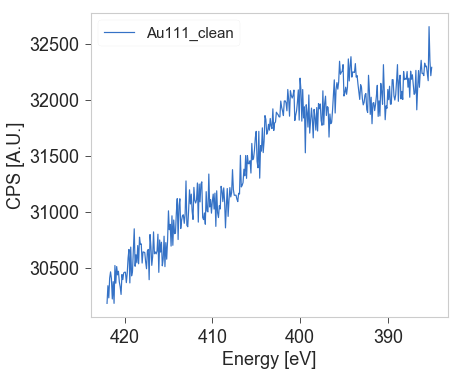

In [59]:
plot_region(experiments[0], 'N1s')

In [64]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a23960b70>,
      dtype=object)

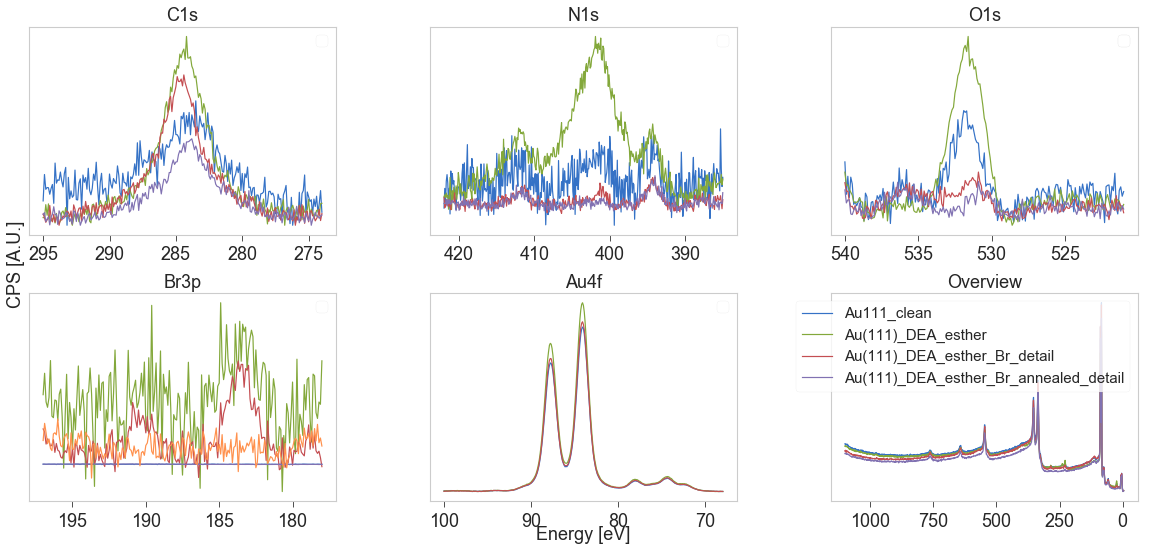

In [65]:
regions = ['C1s', 'N1s', 'O1s', 'Br3p', 'Au4f', 'Overview']
ax = plot_xp_regions(bg_exps, regions, ncols=3);
for a in ax[0]:
    a.invert_xaxis()
ax[1][2].invert_xaxis()    

# Scale to Au 4f (if exists)

KeyError in 'Au4f'


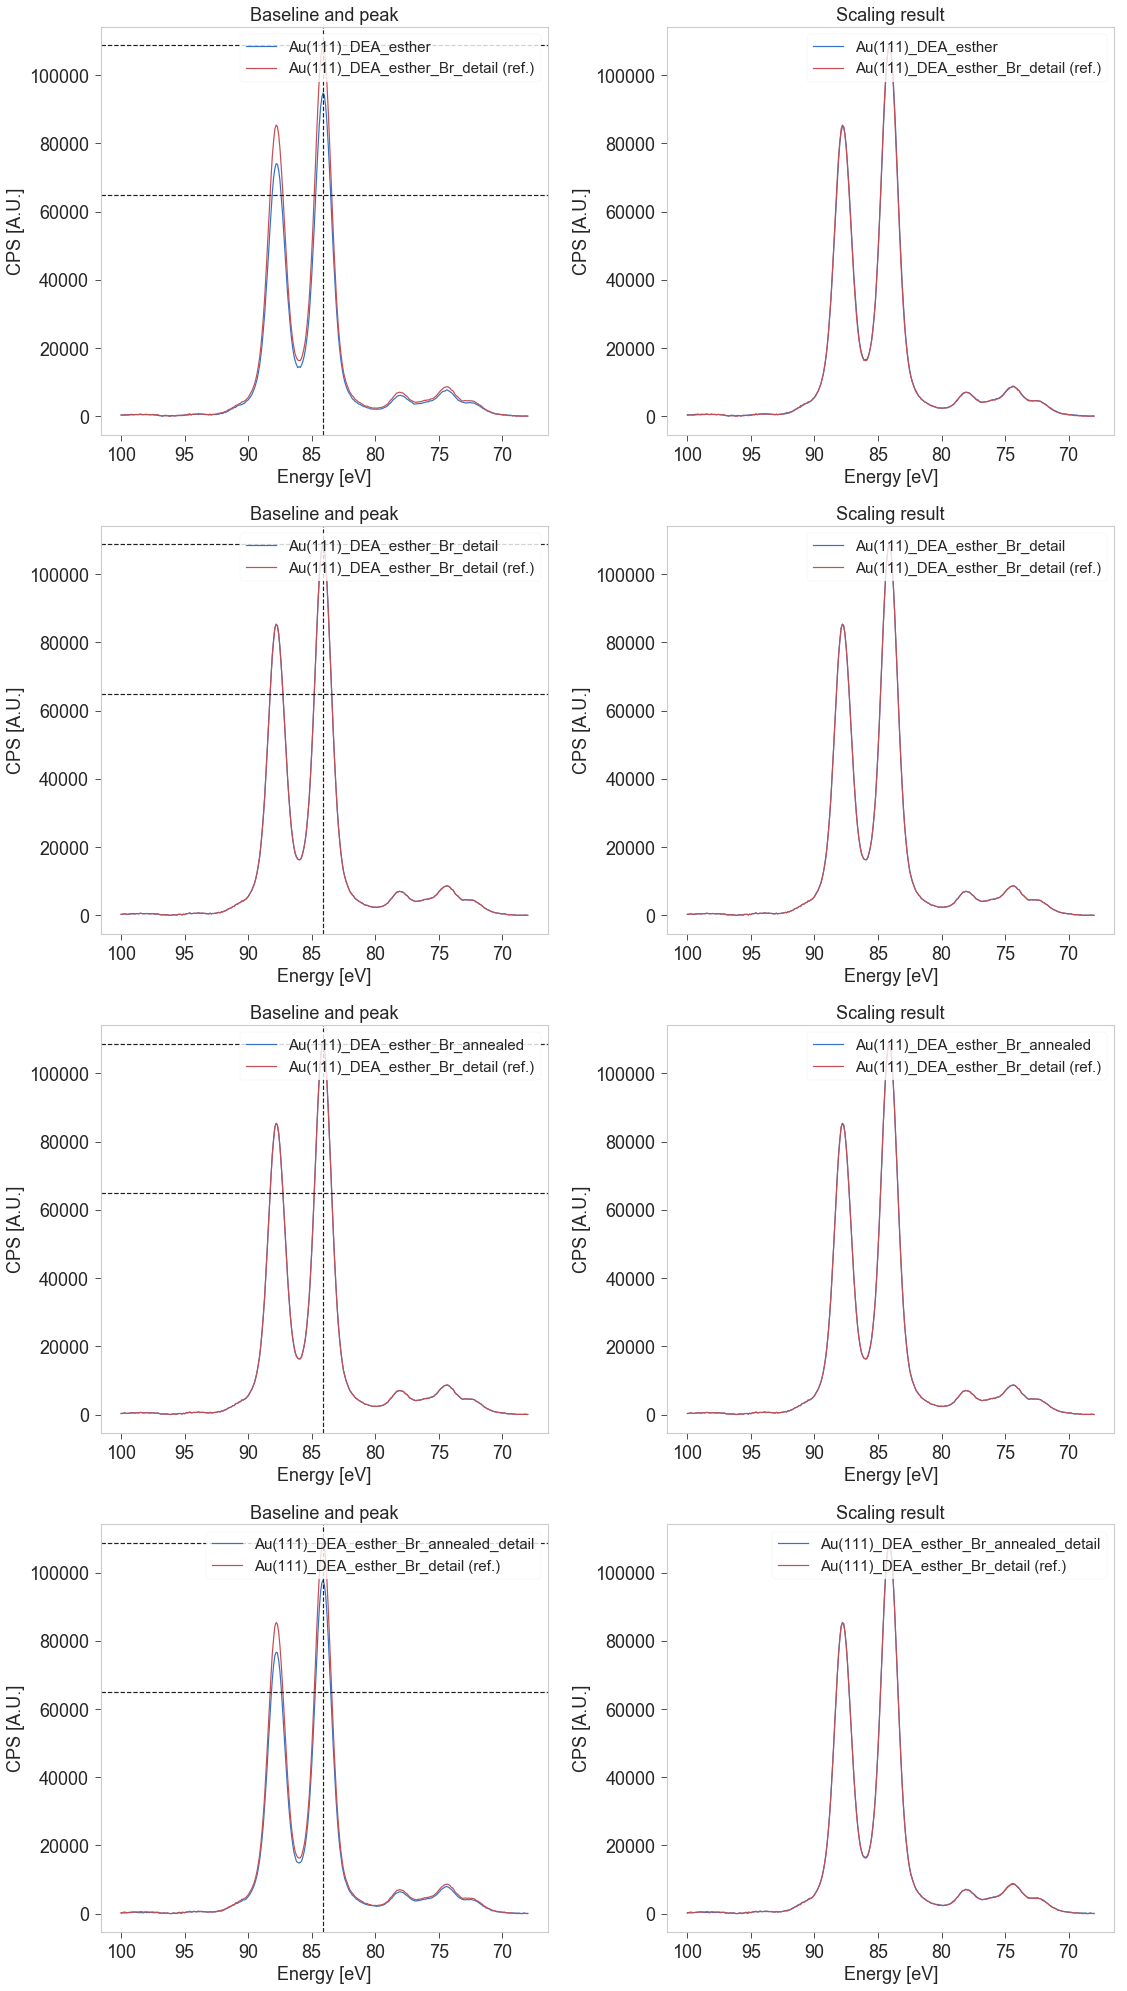

In [28]:
scaled_exps = scale_and_plot_spectra(bg_exps[1:], indRef=1, region='Au4f')

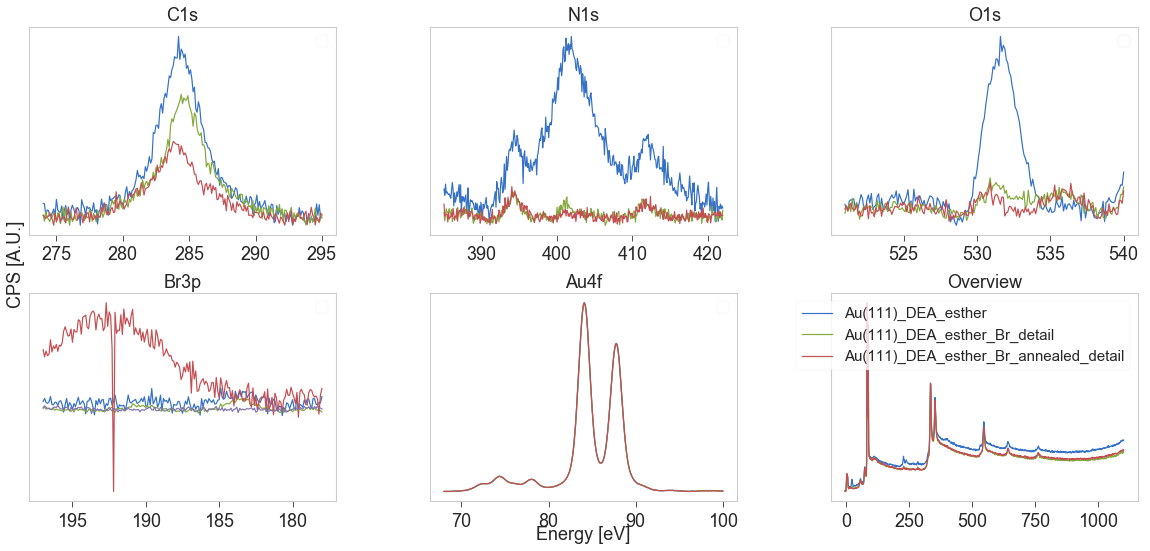

In [29]:
regions = ['C1s', 'N1s', 'O1s', 'Br3p', 'Au4f', 'Overview']
plot_xp_regions(scaled_exps, regions, ncols=3);

# Store processed experiments

In [67]:
def store_results(bg_exps: list, scaled_exps: list):

    for xpu, xps in zip(bg_exps, scaled_exps):
        filepath, filename = os.path.split(xpu.path)
        filename = os.path.splitext(filename)[0]
        newpath = filepath + '/proc/'
        try:
            os.mkdir(newpath)
        except FileExistsError: pass
        print('Stored ', newpath + filename)
        write_processed_xp(newpath + filename + '.uxy', xpu)
        write_processed_xp(newpath + filename + '.sxy', xps)

In [68]:
store_results(bg_exps, scaled_exps)

Stored  /Users/pabloherrero/sabat/xps_spectra/DEA_Au(111)/proc/20200226_Au111_clean
Stored  /Users/pabloherrero/sabat/xps_spectra/DEA_Au(111)/proc/20200227_Au(111)_DEA_esther
Stored  /Users/pabloherrero/sabat/xps_spectra/DEA_Au(111)/proc/20200227_Au(111)_DEA_esther_Br_detail
Stored  /Users/pabloherrero/sabat/xps_spectra/DEA_Au(111)/proc/20200228_Au(111)_DEA_esther_Br_annealed
